In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
# Read in your csv file that has the mid features. 

#data = pd.read_csv('../Feature Extraction/midFeaturesTrainSet.csv')
data = pd.read_csv('../Data/Mid_features/midFeaturesTestFinal.csv')
print(data.shape)

(1200, 140)


In [4]:
data.head()

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,1006_DFA_ANG_XX,1006,ANG,DFA,0.205303,0.026108,2.936040,0.295857,0.220094,1.819624,...,0.009290,0.011798,0.012141,0.005553,0.001191,0.005477,0.013535,0.017165,0.008230,0.008214
1,1006_DFA_DIS_XX,1006,DIS,DFA,0.142912,0.009082,2.815900,0.227427,0.198710,0.867856,...,0.043360,0.034025,0.037411,0.016621,0.002165,0.006136,0.005255,0.008078,0.006201,0.013113
2,1006_DFA_FEA_XX,1006,FEA,DFA,0.150361,0.023924,2.758088,0.214044,0.187709,0.842085,...,0.016754,0.011521,0.040531,0.011855,0.010751,0.012277,0.005750,0.014204,0.013292,0.012245
3,1006_DFA_HAP_XX,1006,HAP,DFA,0.117750,0.012498,2.945889,0.220303,0.219790,0.914615,...,0.033142,0.021647,0.012535,0.028002,0.018135,0.012021,0.022196,0.020446,0.008418,0.012261
4,1006_DFA_NEU_XX,1006,NEU,DFA,0.118134,0.016632,2.802065,0.193803,0.183517,0.747918,...,0.026941,0.010169,0.038335,0.015219,0.011879,0.015302,0.008216,0.013460,0.016431,0.012039


In [5]:
# Split the data into train and test set, stratified by Emotion.
data_train, data_test = train_test_split(data.copy(),
                                   shuffle=True,
                                   random_state=608,
                                   stratify=data.Emotion,
                                   test_size=0.2
                                   )

In [6]:
data.sample(5)

,FileID,actorID,Emotion,SentenceID,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
986,1068_TIE_SAD_XX,1068,SAD,TIE,0.096312,0.019644,2.836340,0.174285,0.193105,0.661134,...,0.007241,0.013384,0.017160,0.019941,0.001590,0.030049,0.021084,0.034158,0.010656,0.010064
971,1068_MTI_FEA_XX,1068,FEA,MTI,0.103575,0.014100,2.912661,0.174976,0.183814,0.691902,...,0.030514,0.033440,0.032429,0.007091,0.002507,0.005912,0.019430,0.015630,0.007788,0.010761
1167,1089_IWW_HAP_XX,1089,HAP,IWW,0.128921,0.038869,2.928011,0.251774,0.231989,0.916238,...,0.029061,0.028145,0.033973,0.010203,0.001551,0.005653,0.005607,0.011446,0.005932,0.012068
1033,1070_IWW_HAP_XX,1070,HAP,IWW,0.093058,0.020210,2.817233,0.182635,0.205554,0.498512,...,0.015470,0.016634,0.019838,0.020822,0.020542,0.013018,0.020919,0.019563,0.016823,0.010891
293,1029_IWW_ANG_XX,1029,ANG,IWW,0.121542,0.015737,2.836044,0.213932,0.199362,0.784010,...,0.018694,0.019331,0.018119,0.006519,0.009298,0.022853,0.015094,0.012972,0.006075,0.009310


In [7]:
# Check the percentages of the different emotion categories in the training set

data_train.Emotion.value_counts(normalize=True)

NEU    0.179167
HAP    0.164583
DIS    0.164583
SAD    0.164583
ANG    0.163542
FEA    0.163542
Name: Emotion, dtype: float64

In [8]:
# Check the percentages of the different emotion categories in the test set

data_test.Emotion.value_counts(normalize=True)

NEU    0.179167
ANG    0.166667
FEA    0.166667
HAP    0.162500
DIS    0.162500
SAD    0.162500
Name: Emotion, dtype: float64

In [9]:
y_train = data_train[['Emotion']]
y_test  = data_test[['Emotion']]

X_train = data_train.drop(columns  = ['FileID','actorID', 'Emotion', 'SentenceID'])
X_test  = data_test.drop(columns   = ['FileID','actorID', 'Emotion', 'SentenceID'])

In [10]:
X_train

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
461,0.080698,0.013578,2.803972,0.142621,0.167529,0.373465,0.010906,0.106852,-27.247699,2.958739,...,0.009468,0.008180,0.012773,0.019310,0.018871,0.007007,0.029670,0.027233,0.011976,0.009527
759,0.089740,0.025695,2.907504,0.173825,0.188762,0.710599,0.009510,0.124229,-26.915482,1.954998,...,0.017185,0.013575,0.011175,0.024388,0.030789,0.012037,0.025146,0.028449,0.020372,0.013072
597,0.238177,0.013077,2.905675,0.322363,0.218016,1.171579,0.009439,0.362370,-31.237721,0.781575,...,0.011416,0.010240,0.022533,0.057117,0.009571,0.016707,0.010440,0.024035,0.011931,0.015085
592,0.136163,0.007066,2.752619,0.189286,0.180582,0.768380,0.009958,0.170456,-29.224452,1.735371,...,0.031312,0.016222,0.028554,0.034754,0.004850,0.022695,0.009279,0.010812,0.006654,0.013873
1045,0.105722,0.028597,2.927700,0.184606,0.191557,0.687009,0.009979,0.155609,-26.918735,2.685408,...,0.011123,0.016848,0.009740,0.009926,0.011003,0.003178,0.017163,0.023463,0.024998,0.008024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.083615,0.036232,2.893697,0.160953,0.191722,0.457508,0.014211,0.113293,-26.563147,2.622612,...,0.025442,0.024498,0.031104,0.015860,0.017685,0.030057,0.020350,0.020498,0.012249,0.015705
589,0.199763,0.009645,3.047153,0.284785,0.255579,0.842882,0.006695,0.314678,-26.534919,2.921388,...,0.018767,0.021681,0.022038,0.021366,0.010005,0.018179,0.008739,0.009833,0.004211,0.007833
864,0.064492,0.019789,2.903565,0.144640,0.196114,0.290866,0.012914,0.086686,-26.642754,3.511352,...,0.017299,0.011075,0.005699,0.012219,0.003699,0.013181,0.016543,0.032134,0.022106,0.008669
994,0.089018,0.043579,3.032351,0.184625,0.194018,0.690518,0.010573,0.167430,-24.093586,2.175615,...,0.036266,0.056454,0.041510,0.009844,0.001287,0.002769,0.010370,0.010240,0.001389,0.014212


In [11]:
# Add a column to the y vectors encoding each of the emotions.

y_train_dummies = pd.get_dummies(y_train)
y_train         = pd.concat([y_train, y_train_dummies], axis=1)
y_train["Emotion_ALL"]  = 1*y_train["Emotion_NEU"] + 2*y_train["Emotion_ANG"] + 3*y_train["Emotion_HAP"] + 4*y_train["Emotion_SAD"] + 5*y_train["Emotion_FEA"] + 6*y_train["Emotion_DIS"]
y_train = y_train.drop(columns  = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])

y_test_dummies = pd.get_dummies(y_test)
y_test         = pd.concat([y_test, y_test_dummies], axis=1)
y_test["Emotion_ALL"]  = 1*y_test["Emotion_NEU"] + 2*y_test["Emotion_ANG"] + 3*y_test["Emotion_HAP"] + 4*y_test["Emotion_SAD"] + 5*y_test["Emotion_FEA"] + 6*y_test["Emotion_DIS"]
y_test  = y_test.drop(columns   = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])


In [12]:
# Add a column to the y vectors encoding each of the emotions.

#y_train_dummies = pd.get_dummies(y_train)
#y_train         = pd.concat([y_train, y_train_dummies], axis=1)
#y_train["Emotion_ALL"]  = 1*y_train["Emotion_NEU"] + 2*y_train["Emotion_ANG"] + 1*y_train["Emotion_HAP"] + 1*y_train["Emotion_SAD"] + 1*y_train["Emotion_FEA"] + 1*y_train["Emotion_DIS"]
#y_train = y_train.drop(columns  = ["Emotion", "Emotion_NEU", "Emotion_ANG", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])

#y_test_dummies = pd.get_dummies(y_test)
#y_test         = pd.concat([y_test, y_test_dummies], axis=1)
#y_test["Emotion_ALL"]  = 1*y_test["Emotion_NEU"] + 2*y_test["Emotion_ANG"] + 1*y_test["Emotion_HAP"] + 1*y_test["Emotion_SAD"] + 1*y_test["Emotion_FEA"] + 1*y_test["Emotion_DIS"]
#y_test  = y_test.drop(columns   = ["Emotion", "Emotion_NEU", "1", "Emotion_HAP", "Emotion_SAD", "Emotion_FEA", "Emotion_DIS"])


In [13]:
X_test

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
607,0.095291,0.031045,3.114116,0.189062,0.181523,0.676827,0.010841,0.188554,-25.538596,2.201541,...,0.041134,0.037353,0.052478,0.027121,0.001157,0.006384,0.003894,0.003013,0.002682,0.015266
769,0.109883,0.019856,2.840288,0.178928,0.180084,0.719624,0.012554,0.160799,-26.963255,2.087217,...,0.021279,0.026115,0.012853,0.027060,0.015548,0.010144,0.017163,0.029615,0.014936,0.011098
68,0.136302,0.009163,2.804651,0.227975,0.209701,0.845441,0.010270,0.208429,-27.824531,1.502953,...,0.021240,0.023924,0.025206,0.015184,0.021137,0.008857,0.005001,0.006388,0.008582,0.013463
905,0.093639,0.032500,2.959505,0.169882,0.188971,0.671063,0.012597,0.136054,-28.260884,2.335155,...,0.010324,0.014244,0.031645,0.029992,0.021730,0.022695,0.008263,0.016858,0.022732,0.011842
428,0.094459,0.006679,2.763293,0.176636,0.218092,0.553564,0.015507,0.112089,-30.246913,2.574699,...,0.045051,0.046614,0.034857,0.030187,0.006571,0.005627,0.013769,0.014774,0.009246,0.011868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.123025,0.044971,2.865822,0.197257,0.206675,0.389828,0.018873,0.150546,-25.653369,2.741836,...,0.005203,0.007057,0.034508,0.027213,0.001480,0.039155,0.037573,0.014955,0.003515,0.012353
346,0.078329,0.008131,2.569055,0.145561,0.175226,0.374358,0.034415,0.102472,-32.207661,3.276957,...,0.016269,0.027151,0.051163,0.068608,0.007836,0.008409,0.041730,0.031590,0.016066,0.021646
654,0.255015,0.021346,2.968809,0.321763,0.235648,0.952784,0.008956,0.335231,-27.064224,1.899495,...,0.022686,0.005410,0.014154,0.016019,0.002205,0.028714,0.011691,0.019113,0.020777,0.010532
446,0.145046,0.010578,2.826515,0.219972,0.194271,1.071905,0.008190,0.213180,-28.730227,1.040844,...,0.007979,0.005278,0.015948,0.031762,0.017304,0.023377,0.025716,0.024021,0.010448,0.011743


In [14]:
np.unique(y_test)

array([1, 2, 3, 4, 5, 6], dtype=uint8)

In [15]:
# Build pipeline to first scale the mid feature data, then apply the SVC

pipe = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])


# Fit the model to the training data
classifier = pipe.fit(X_train, y_train)

# Get the model's prediction on the test data
pred = pipe.predict(X_test)




/home/mnoorani/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
# Look at the confusion matrix for the test data :
cnf_matrix_test = confusion_matrix(y_test, pred)

print("confusion matrix for all six emotions of the test set is:")
print(cnf_matrix_test)
print()

# Look at the confusion matrix for the training data:
pred_train = pipe.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train, pred_train)

print("confusion matrix for all six emotions of the train set is:")
print(cnf_matrix_train)


confusion matrix for all six emotions of the test set is:
[[19  4  1 14  1  4]
 [ 4 25  3  2  1  5]
 [ 8  8 12  2  4  5]
 [ 9  1  2 10 13  4]
 [ 4  5  4  6 18  3]
 [ 8  5  7  8  1 10]]

confusion matrix for all six emotions of the train set is:
[[157   3   2   3   1   6]
 [  5 137   9   2   1   3]
 [ 11  13 128   2   1   3]
 [ 13   6   3 124   2  10]
 [ 15   5   6   6 120   5]
 [ 14   7  10   6   4 117]]


In [17]:
cnf_matrix_test

array([[19,  4,  1, 14,  1,  4],
       [ 4, 25,  3,  2,  1,  5],
       [ 8,  8, 12,  2,  4,  5],
       [ 9,  1,  2, 10, 13,  4],
       [ 4,  5,  4,  6, 18,  3],
       [ 8,  5,  7,  8,  1, 10]])

In [18]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]

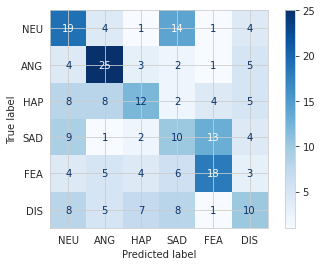

In [19]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
farmers = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]

harvest = np.array([[67.2,  4.2,  4.3,  9.2,  7.3,  7.9],
                    [7.9,  68.2,  1.6,  1.1,  3.9,  17.3],
                    [21.3,  3.7, 62.4,  1.8,  5.8,  4.9],
                    [23,    2.5,  1.5, 54.1, 12.1,  6.8],
                    [16.4,    5,  4.2,  8.8, 59.2,  6.4],
                    [17.5, 16.3,  2.4,  4.7,  5.5, 53.6]] )


fig, ax = plt.subplots()
im = ax.imshow(harvest, cmap=plt.cm.Reds,)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="k")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
harvest1 = np.array([[83,  6, 13, 26, 21, 26],
 [17, 89, 11,  2, 17, 24],
 [26, 30, 42, 15, 32, 15],
 [31,  3,  2, 67, 32, 25],
 [17, 16, 20, 25, 64, 18],
 [35, 24, 19, 23, 18, 42]])

for i in range (0, 5):
    percentage = harvest1/harvest1.sum(axis=0)[i]

                    

In [ ]:
percentage1 = np.around(percentage*100, 1)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
farmers = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]


                    
harvest = np.array(percentage1)


fig, ax = plt.subplots()
im = ax.imshow(percentage1, cmap=plt.cm.Reds,)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, percentage1[i, j],
                       ha="center", va="center", color="k")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]
farmers = ["NEU", "ANG", "HAP", "SAD", "FEA", "DIS"]


                    
harvest = np.array([[67.2,  4.2,  4.3,  9.2,  7.3,  7.9],
                    [7.9,  68.2,  1.6,  1.1,  3.9,  17.3],
                    [21.3,  3.7, 62.4,  1.8,  5.8,  4.9],
                    [23,    2.5,  1.5, 54.1, 12.1,  6.8],
                    [16.4,    5,  4.2,  8.8, 59.2,  6.4],
                    [17.5, 16.3,  2.4,  4.7,  5.5, 53.6]] )


fig, ax = plt.subplots()
im = ax.imshow(harvest, cmap=plt.cm.Reds,)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="k")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


In [ ]:

FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

In [ ]:
TP/(TP+FN)

In [ ]:
# NEU 75   47
# ANG 52   55
# HAP 28   26 
# SAD 25   41
# FEA 33   40 
# DIS 29   26


In [ ]:
# from the paper
#(75 + 52 + 28 + 25 + 33 + 29)/6 = 40.33


In [ ]:
# our data
#(47 + 55 + 26 + 41 + 40 + 26)/6 = 39.16

In [ ]:
cnf_matrix_test.sum()

In [ ]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
ACC